In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

sc.settings.n_jobs = 96
sc.set_figure_params(figsize=(5, 5), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [4]:
adata = sc.read_h5ad("Archived/Data/ROSMAP2_Annotated_Clinical_1106.h5ad")

In [ ]:
adata.raw.shape

(1560049, 35476)

In [ ]:
# adata = adata.raw.to_adata()

In [5]:
adata

AnnData object with n_obs × n_vars = 1560049 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sex_colors', 'cluster_Allen_colors', 'cluster_main_colors', 'cluster_original_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors',

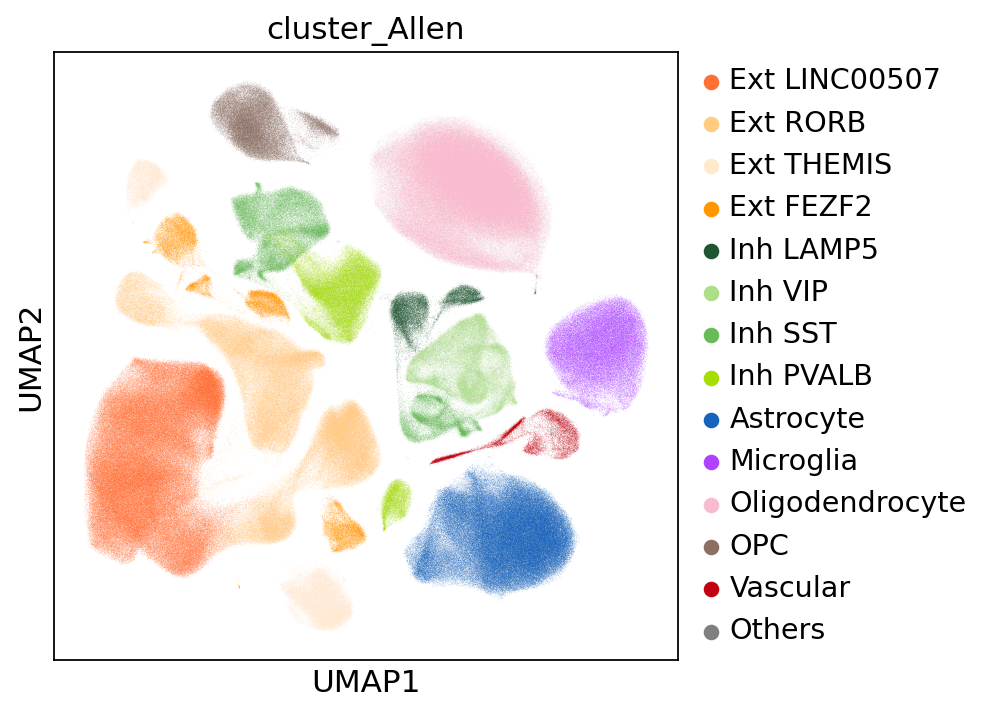

In [6]:
sc.pl.umap(adata, color = "cluster_Allen")

In [8]:
adata_Endo = sc.read_h5ad("Archived/Data/ROSMAP2_Annotated_Clinical_Endo_1112.h5ad")

In [9]:
adata_Endo

AnnData object with n_obs × n_vars = 17768 × 5000
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'Library', 'Hemisphere', 'PMI', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'batch_numeric', 'sampleID_numeric', 'cluster_Allen', 'projid', 'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype', 'age_at_visit_max', 'age_first_ad_dx', 'age_death', 'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc', 'cogdx', 'dcfdx_lv', 'individualID', 'leiden_0.3', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'cluster_Endo', 'cluster_Endo2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sex_colors', 'cluster_Allen_colors', 'cluster_Endo_col

In [ ]:
# adata_Endo = adata_Endo.raw.to_adata()

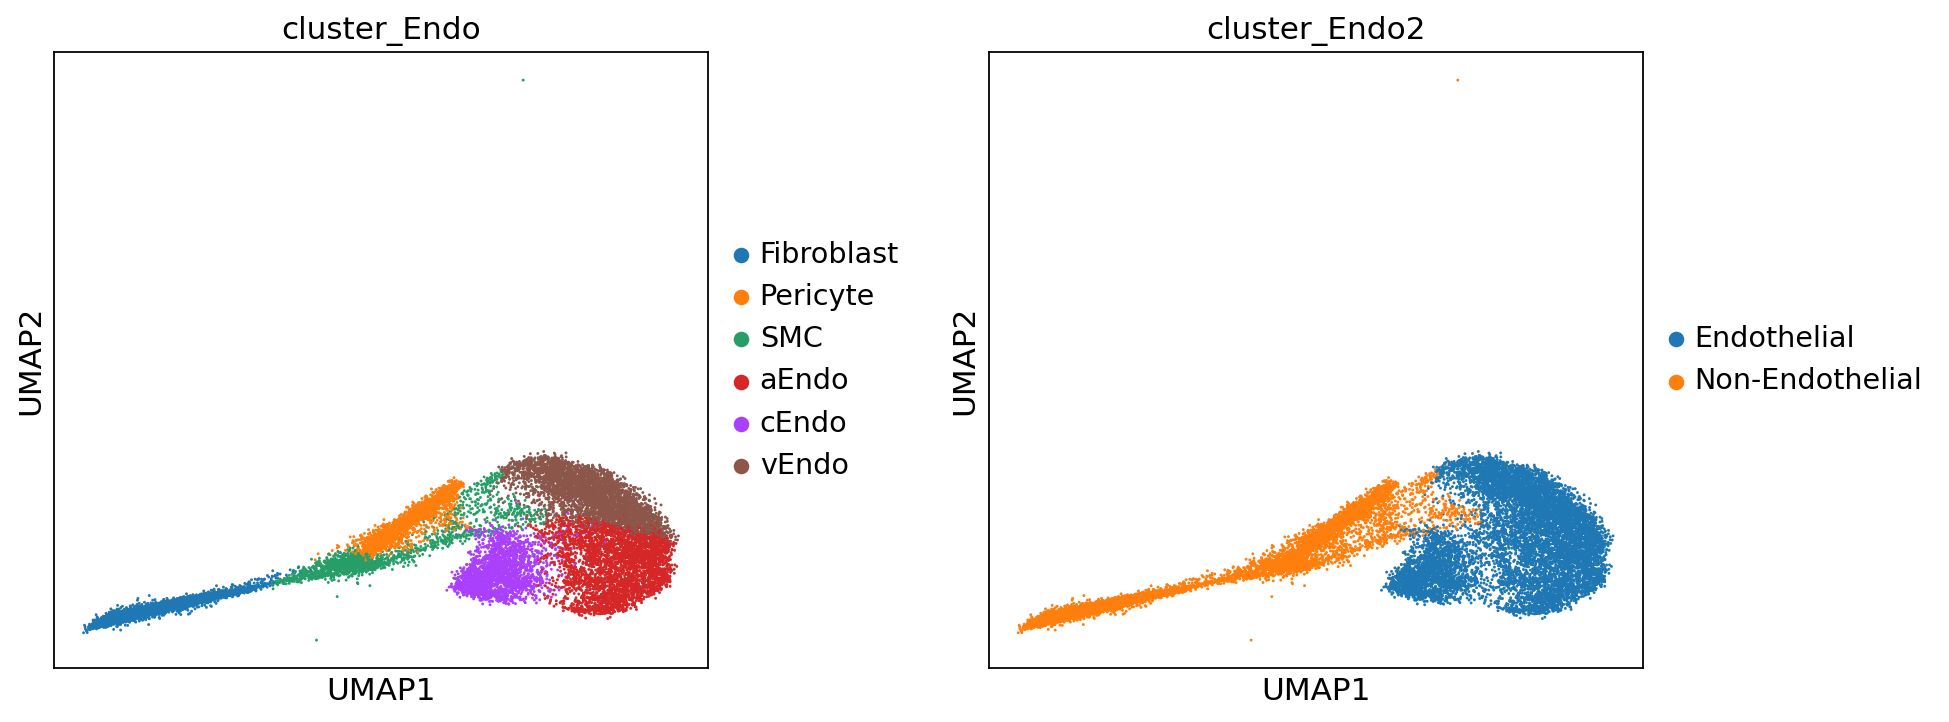

In [10]:
sc.pl.umap(adata_Endo, color = ["cluster_Endo", "cluster_Endo2"], wspace = 0.3)

# Add cluster_Endo columns to adata

In [11]:
adata_meta = pd.DataFrame(adata.obs)

In [12]:
adata_meta["barcode"] = adata_meta.index
# adata_meta

In [21]:
adata_Endo_meta = pd.DataFrame(adata_Endo.obs)

In [22]:
adata_Endo_meta = adata_Endo_meta[["cluster_Endo", "cluster_Endo2"]]
adata_Endo_meta 

,cluster_Endo,cluster_Endo2
barcodes,,
200826-B49-A_TTCCGTGTCGGCTGAC-1,cEndo,Endothelial
200826-B49-A_AAACCCACAACAACAA-1,aEndo,Endothelial
200826-B49-A_CCACAAAAGAGGCGGA-1,cEndo,Endothelial
200826-B49-A_CATACTTCAACTACGT-1,cEndo,Endothelial
200826-B49-A_CCCTCAACATACTTTC-1,cEndo,Endothelial
...,...,...
200313-B22-B_TTGATGGAGGAAAGTG-1,Fibroblast,Non-Endothelial
200313-B22-B_ATTCACTCATCATTTC-1,cEndo,Endothelial
200313-B22-B_TTCAGGACACGTGAGA-1,cEndo,Endothelial


In [23]:
adata_Endo_meta["barcode"] = adata_Endo_meta.index

In [24]:
meta = pd.merge(adata_meta, adata_Endo_meta, on ="barcode", how = "outer")
meta

,batch,sampleID,Age,Assay,Stage,Race,Library,Hemisphere,PMI,Brain_Region,...,cts_mmse30_lv,pmi,braaksc,ceradsc,cogdx,dcfdx_lv,individualID,barcode,cluster_Endo,cluster_Endo2
0,200826-B49-A,R9239503,33215.000000,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,4.400000,BA9,...,13.0,4.400000,5.0,2.0,4.0,4.0,R9239503,200826-B49-A_TTCCGTGTCGGCTGAC-1,cEndo,Endothelial
1,200826-B49-A,R7651923,33215.000000,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,6.766667,BA9,...,26.0,6.766667,4.0,2.0,1.0,1.0,R7651923,200826-B49-A_AAACCCACAACAACAA-1,aEndo,Endothelial
2,200826-B49-A,R8477425,33113.569473,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,6.583333,BA9,...,28.0,6.583333,4.0,4.0,5.0,6.0,R8477425,200826-B49-A_CCACAAAAGAGGCGGA-1,cEndo,Endothelial
3,200826-B49-A,R9239503,33215.000000,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,4.400000,BA9,...,13.0,4.400000,5.0,2.0,4.0,4.0,R9239503,200826-B49-A_CATACTTCAACTACGT-1,cEndo,Endothelial
4,200826-B49-A,R9239503,33215.000000,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,4.400000,BA9,...,13.0,4.400000,5.0,2.0,4.0,4.0,R9239503,200826-B49-A_CCCTCAACATACTTTC-1,cEndo,Endothelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560044,200313-B22-B,R4332132,33215.000000,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,6.416667,BA9,...,1.0,6.416667,4.0,2.0,4.0,4.0,R4332132,200313-B22-B_AGGAATAAGTCTGTAC-1,NaN,NaN
1560045,200313-B22-B,R3910349,31364.767283,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,17.000000,BA9,...,30.0,17.000000,1.0,4.0,2.0,2.0,R3910349,200313-B22-B_GATAGCTTCTTCACAT-1,NaN,NaN
1560046,200313-B22-B,R3910349,31364.767283,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,17.000000,BA9,...,30.0,17.000000,1.0,4.0,2.0,2.0,R3910349,200313-B22-B_CAATGACAGACGGTTG-1,NaN,NaN
1560047,200313-B22-B,R7904841,32151.228611,10x Chromium 3' v3,Adult,Caucasian,snRNA,A,5.166667,BA9,...,18.0,5.166667,1.0,3.0,6.0,3.0,R7904841,200313-B22-B_ACGTCCTAGCGTGCTC-1,NaN,NaN


In [25]:
meta.set_index('barcode', inplace = True)

In [26]:
adata.obs = meta

In [27]:
# Create a condition for the ifelse statement
condition = adata.obs['cluster_Allen'] == "Vascular"

# Use np.where to replicate ifelse functionality
adata.obs['cluster_Allen2'] = pd.np.where(condition, adata.obs['cluster_Endo'], adata.obs["cluster_Allen"])

/tmp/ipykernel_1185695/2427963210.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  adata.obs['cluster_Allen2'] = pd.np.where(condition, adata.obs['cluster_Endo'], adata.obs["cluster_Allen"])


In [31]:
# Assuming adata_meta is a DataFrame containing column 'cluster_Allen2'
# If not, replace it with the actual DataFrame name

# Create a condition for the ifelse statement
condition = adata.obs['cluster_Allen2'].isin(["cEndo", "vEndo", "aEndo"])

# Use np.where to replicate ifelse functionality
adata.obs['cluster_Allen2'] = pd.np.where(condition, "Endothelial", adata.obs['cluster_Allen2'])

/tmp/ipykernel_1185695/3870084537.py:8: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  adata.obs['cluster_Allen2'] = pd.np.where(condition, "Endothelial", adata.obs['cluster_Allen2'])


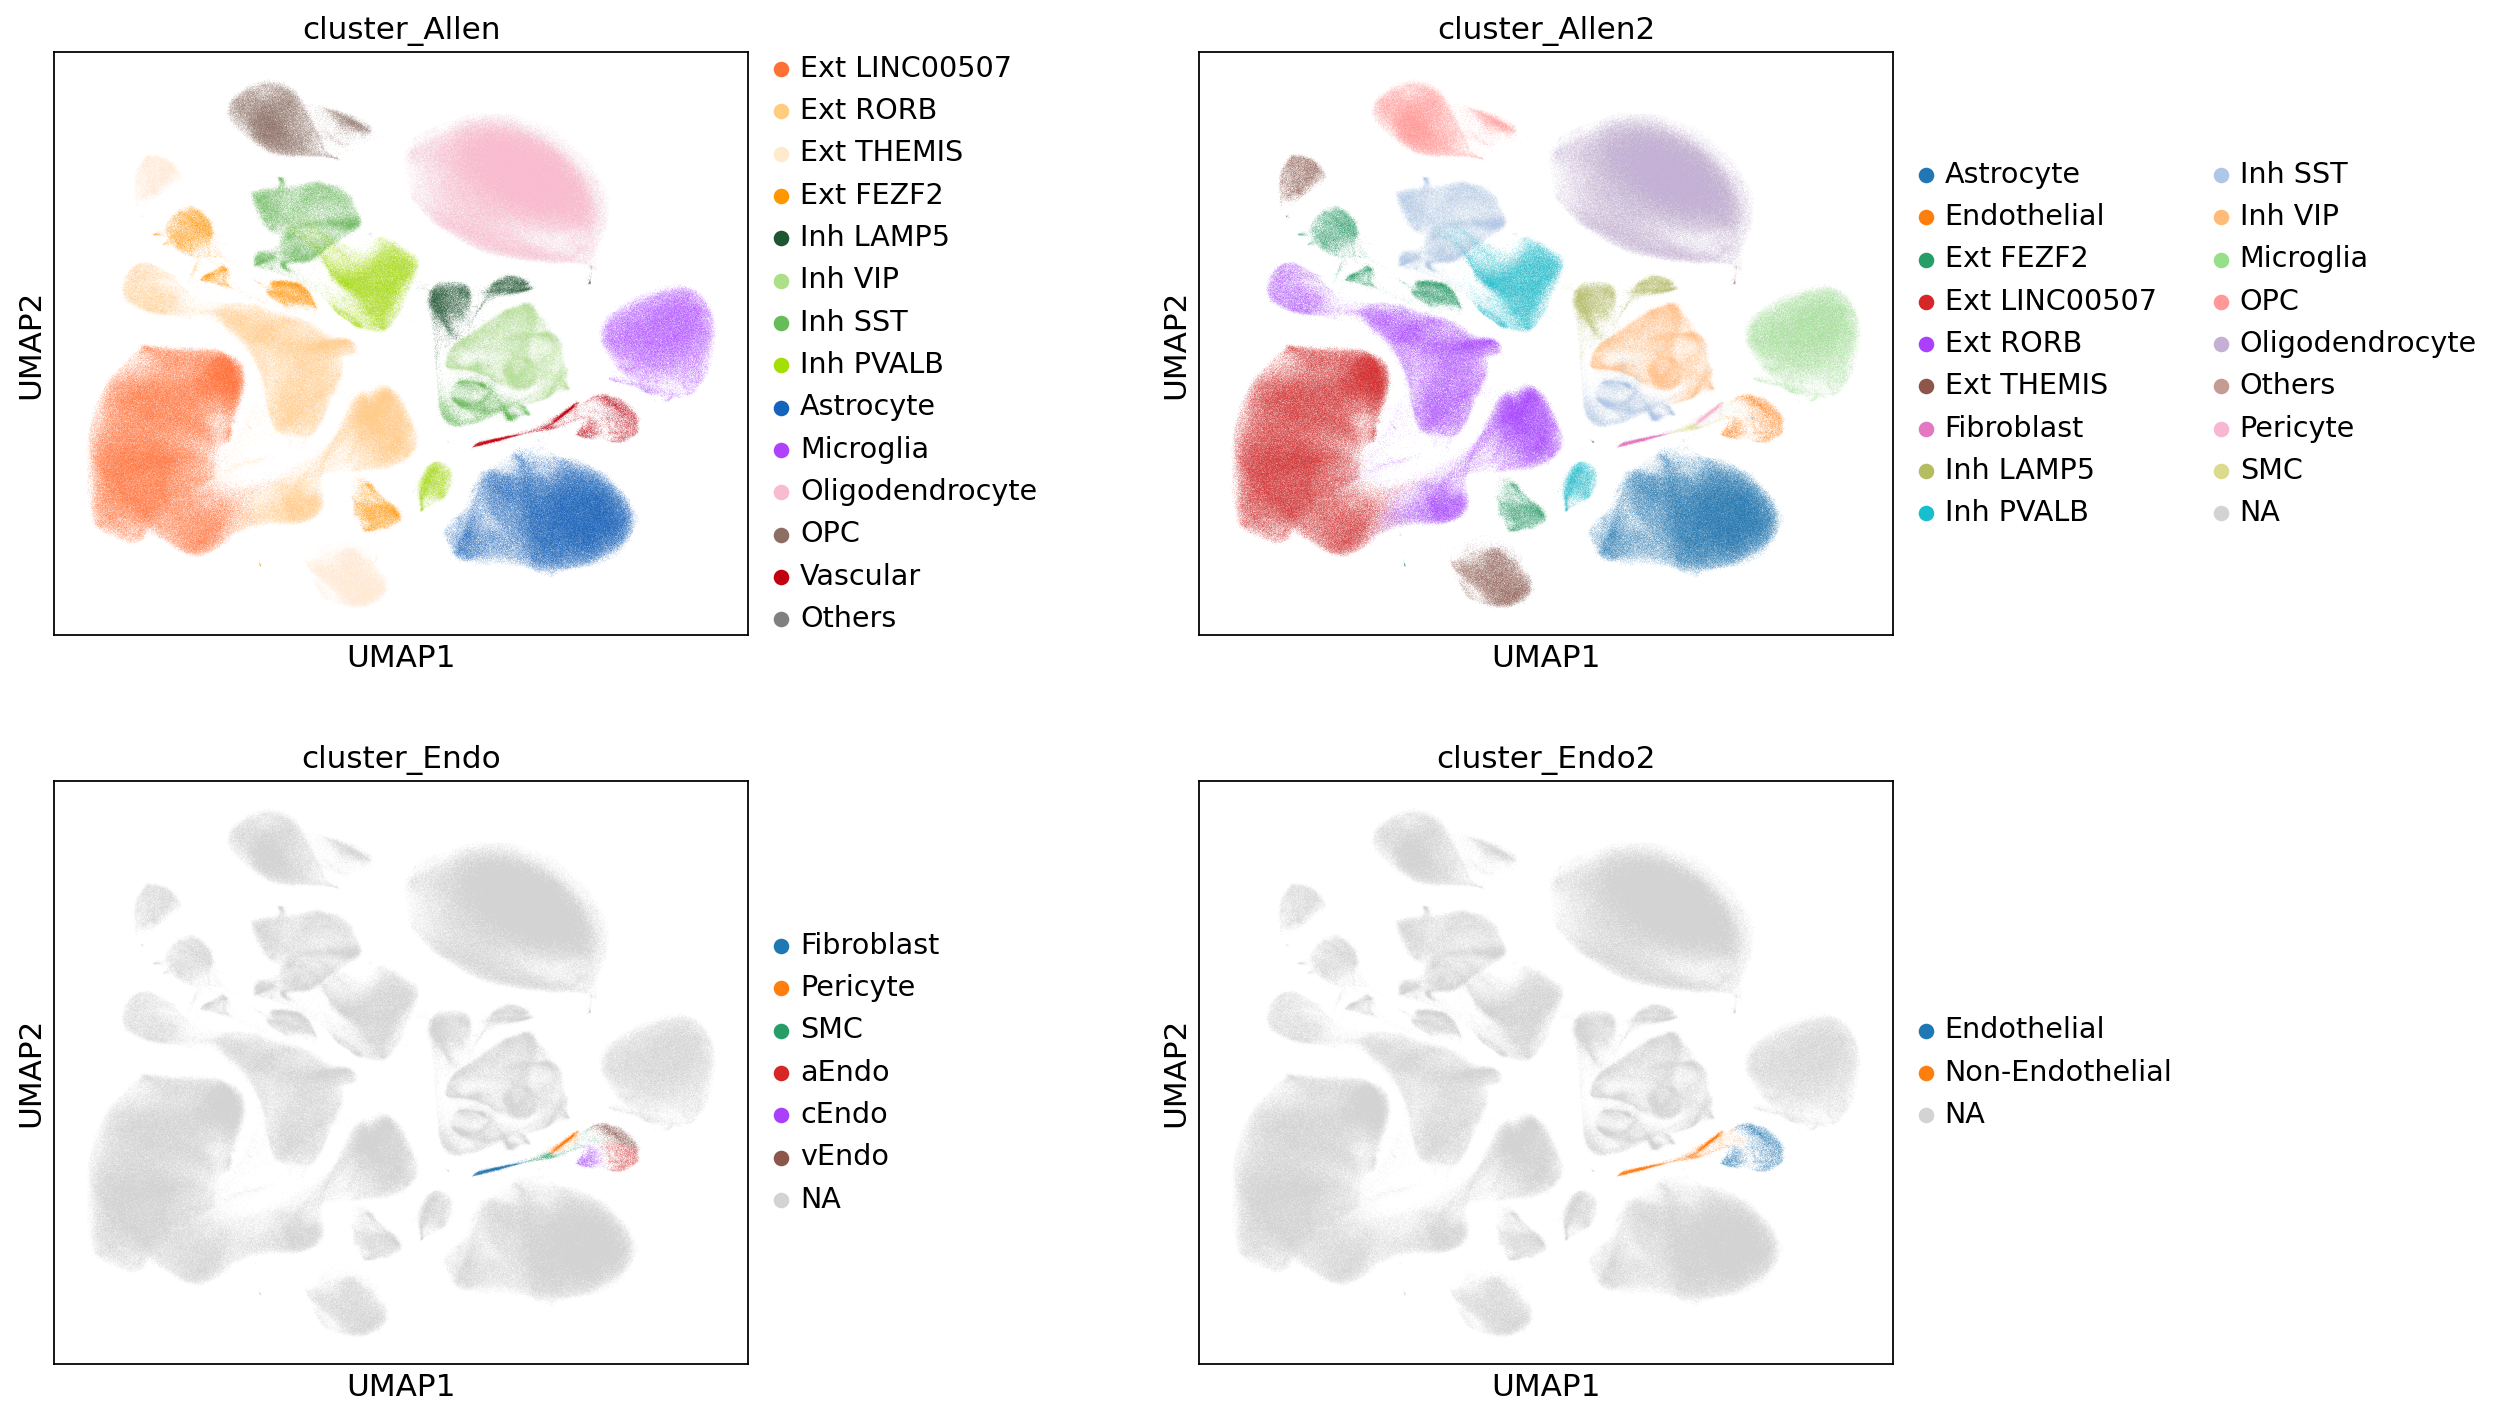

In [32]:
sc.pl.umap(adata, color = ["cluster_Allen", "cluster_Allen2", "cluster_Endo", "cluster_Endo2"], wspace = 0.5, ncols = 2)

In [33]:
adata.write_h5ad("Data/ROSMAP2_Complete_Annotated_Clinical_0206.h5ad") # 20m